# Decisional Tree & Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/kaggle/input/breast-cancer/Breast_Cancer.csv")

print(df.head())


   Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      1

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

# Data vizualization & preprocessing

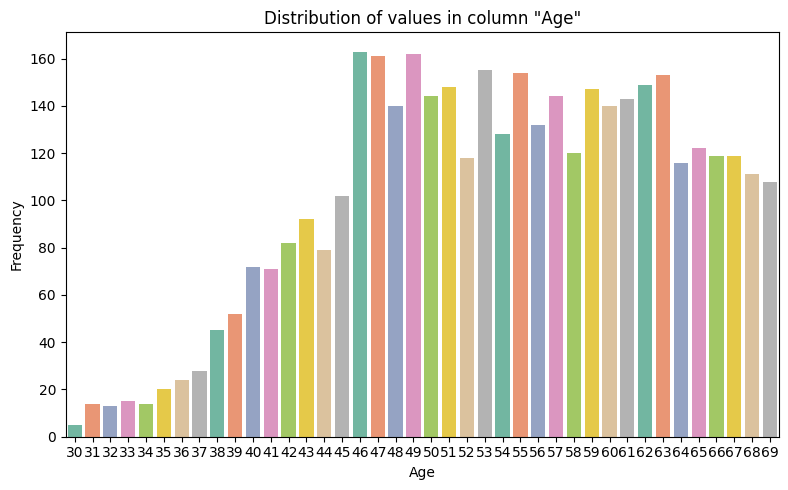

In [3]:
column_name = 'Age'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=column_name, palette='Set2')
plt.title(f'Distribution of values in column \"{column_name}\"')
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Race
White    3413
Other     320
Black     291
Name: count, dtype: int64


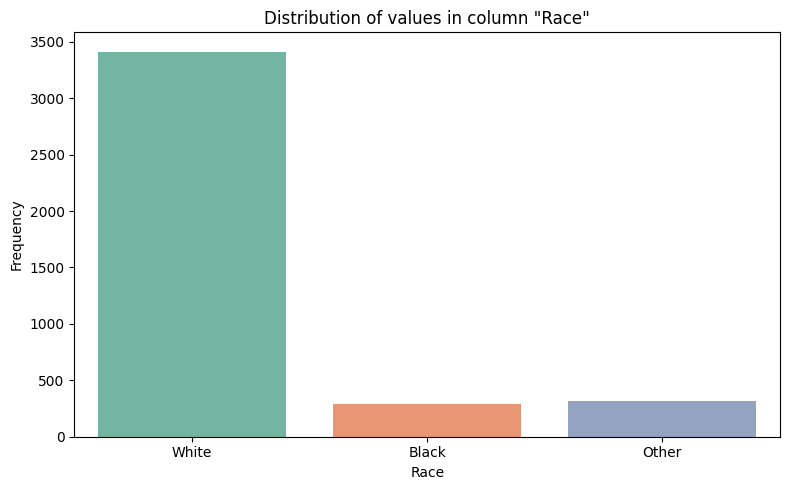

In [4]:
column_name = 'Race' 
print(df[column_name].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=column_name, palette='Set2')
plt.title(f'Distribution of values in column \"{column_name}\"')
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [5]:
le = LabelEncoder()
df['Race_encoded'] = le.fit_transform(df['Race'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'Black': 0, 'Other': 1, 'White': 2}


Marital Status
Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: count, dtype: int64


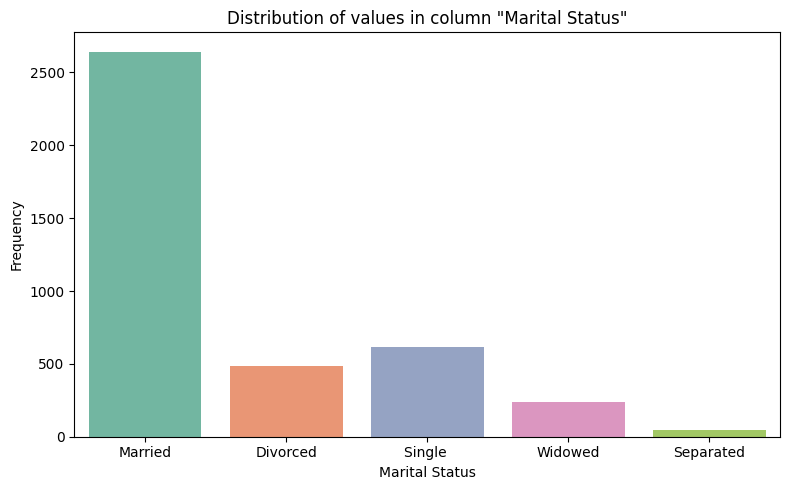

In [6]:
column_name = 'Marital Status' 
print(df[column_name].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=column_name, palette='Set2')
plt.title(f'Distribution of values in column \"{column_name}\"')
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [7]:
df['Marital_Status_encoded'] = le.fit_transform(df['Marital Status'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'Divorced': 0, 'Married': 1, 'Separated': 2, 'Single ': 3, 'Widowed': 4}


T Stage 
T2    1786
T1    1603
T3     533
T4     102
Name: count, dtype: int64


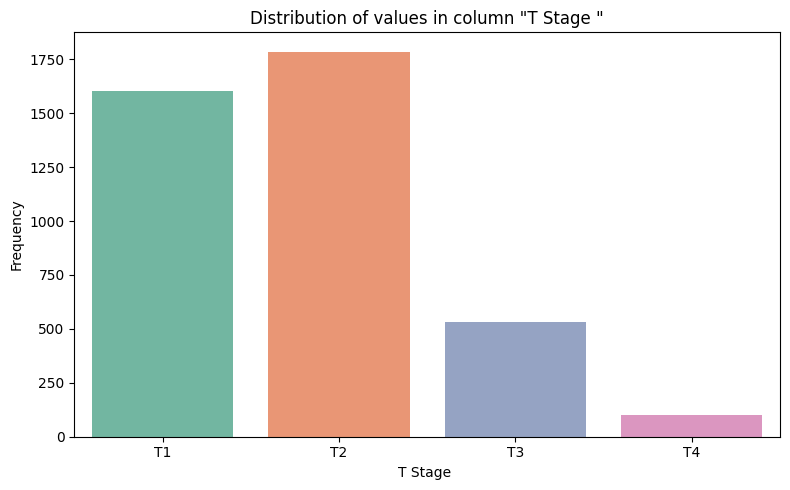

In [8]:
column_name = 'T Stage ' 
print(df[column_name].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=column_name, palette='Set2')
plt.title(f'Distribution of values in column \"{column_name}\"')
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [9]:
df.rename(columns={"T Stage ": "T_Stage"}, inplace=True)
t_stage_mapping = {"T1": 0, "T2": 1, "T3": 2, "T4": 3}
df["T_Stage_encoded"] = df["T_Stage"].map(t_stage_mapping)


N Stage
N1    2732
N2     820
N3     472
Name: count, dtype: int64


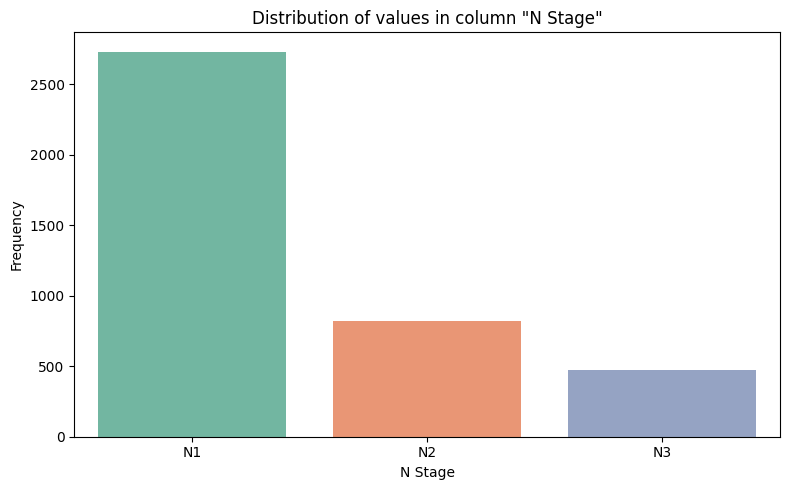

In [10]:
column_name = 'N Stage' 
print(df[column_name].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=column_name, palette='Set2')
plt.title(f'Distribution of values in column \"{column_name}\"')
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [11]:
t_stage_mapping = {"N1": 0, "N2": 1, "N3": 2}
df["N_Stage_encoded"] = df["N Stage"].map(t_stage_mapping)


6th Stage
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64


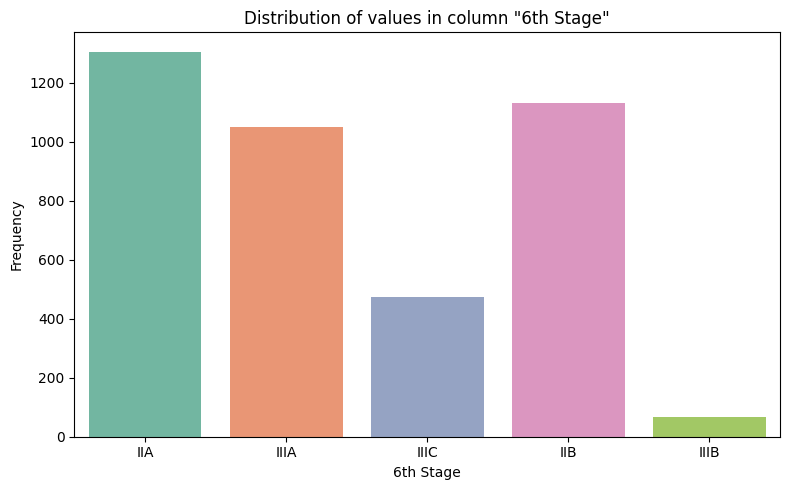

In [12]:
column_name = '6th Stage' 
print(df[column_name].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=column_name, palette='Set2')
plt.title(f'Distribution of values in column \"{column_name}\"')
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [13]:
stage_mapping = {"IIA": 0, "IIB": 1, "IIIA": 2, "IIIB": 3, "IIIC": 4}
df["Stage_6th_encoded"] = df["6th Stage"].map(stage_mapping)

differentiate
Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: count, dtype: int64


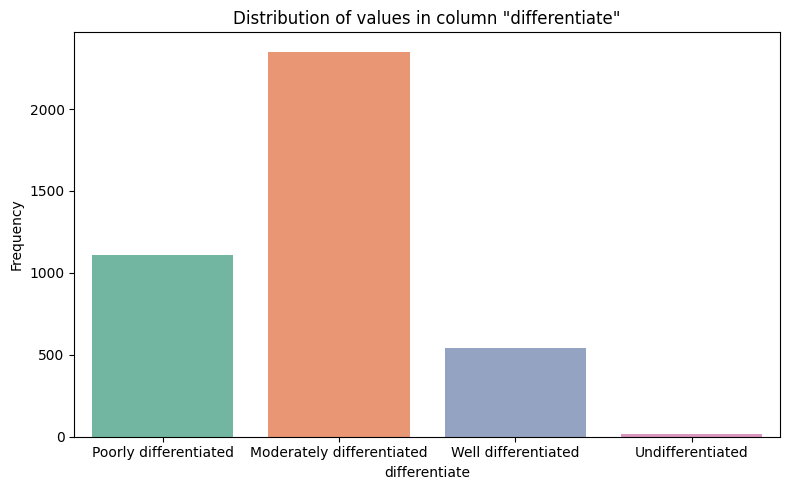

In [14]:
column_name = 'differentiate' 
print(df[column_name].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=column_name, palette='Set2')
plt.title(f'Distribution of values in column \"{column_name}\"')
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [15]:
differentiate_mapping = {
    "Well differentiated": 0,
    "Moderately differentiated": 1,
    "Poorly differentiated": 2,
    "Undifferentiated": 3
}
df["Differentiate_encoded"] = df["differentiate"].map(differentiate_mapping)

Grade
2                        2351
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: count, dtype: int64


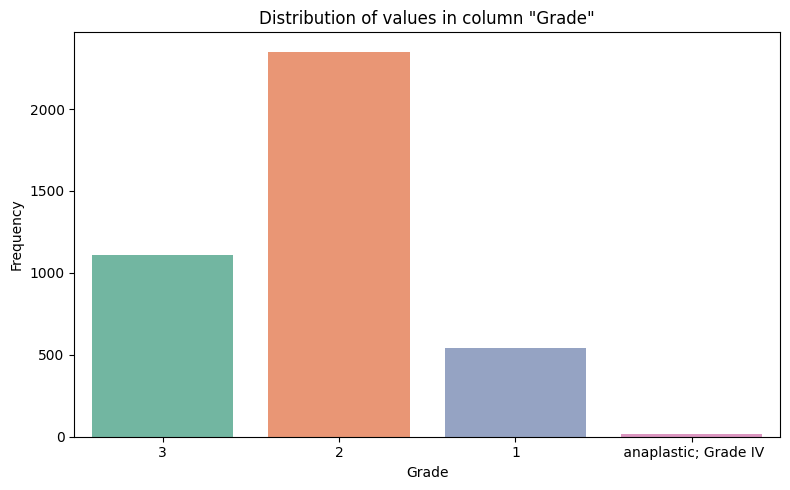

In [16]:
column_name = 'Grade' 
print(df[column_name].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=column_name, palette='Set2')
plt.title(f'Distribution of values in column \"{column_name}\"')
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [17]:
grade_mapping = {
    "1": 0,
    "2": 1,
    "3": 2,
    " anaplastic; Grade IV": 3
}
df["Grade_encoded"] = df["Grade"].map(grade_mapping)


A Stage
Regional    3932
Distant       92
Name: count, dtype: int64


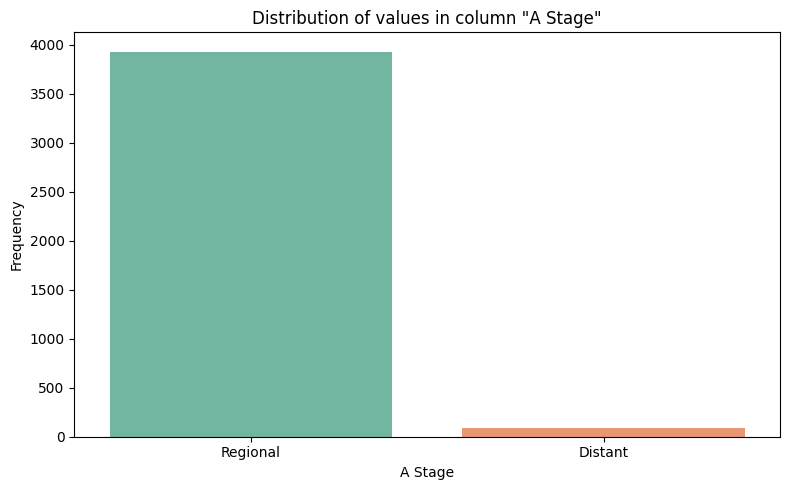

In [18]:
column_name = 'A Stage' 
print(df[column_name].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=column_name, palette='Set2')
plt.title(f'Distribution of values in column \"{column_name}\"')
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [19]:
a_stage_mapping = {
    "Regional": 0,
    "Distant": 1
}
df["A_Stage_encoded"] = df["A Stage"].map(a_stage_mapping)

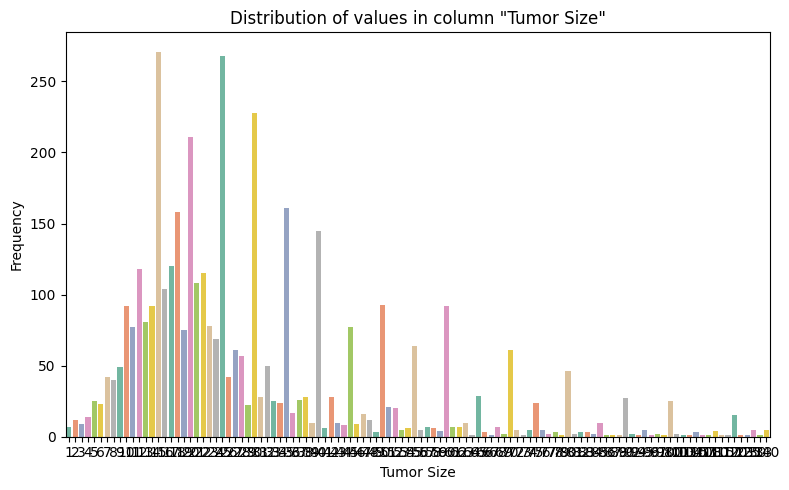

In [20]:
column_name = 'Tumor Size' 
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=column_name, palette='Set2')
plt.title(f'Distribution of values in column \"{column_name}\"')
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Estrogen Status
Positive    3755
Negative     269
Name: count, dtype: int64


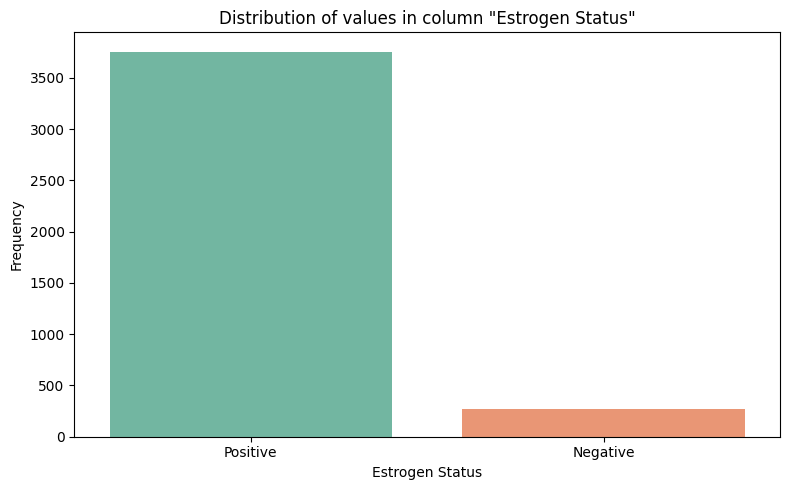

In [21]:
column_name = 'Estrogen Status'
print(df[column_name].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=column_name, palette='Set2')
plt.title(f'Distribution of values in column \"{column_name}\"')
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Progesterone Status
Positive    3326
Negative     698
Name: count, dtype: int64


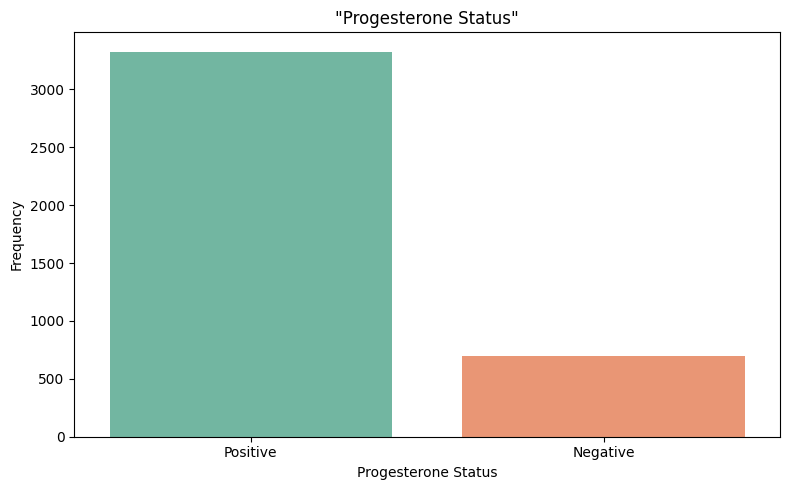

In [22]:
column_name = 'Progesterone Status'
print(df[column_name].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=column_name, palette='Set2')
plt.title(f'"{column_name}\"')
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [23]:
hormone_mapping = {
    "Negative": 0,
    "Positive": 1
}
df["Estrogen_Status_encoded"] = df["Estrogen Status"].map(hormone_mapping)
df["Progesterone_Status_encoded"] = df["Progesterone Status"].map(hormone_mapping)

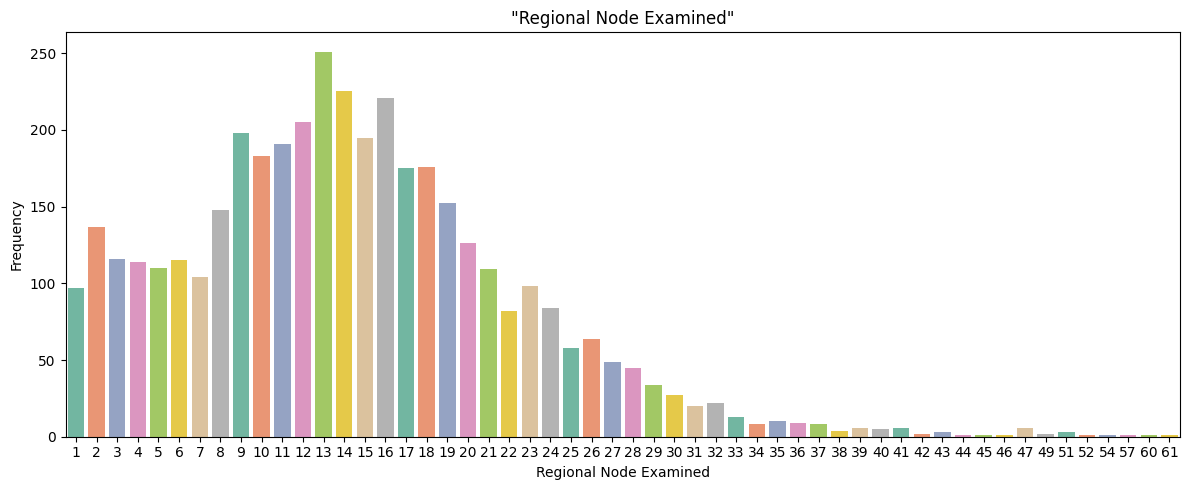

In [24]:
column_name = 'Regional Node Examined'
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x=column_name, palette='Set2')
plt.title(f'"{column_name}\"')
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

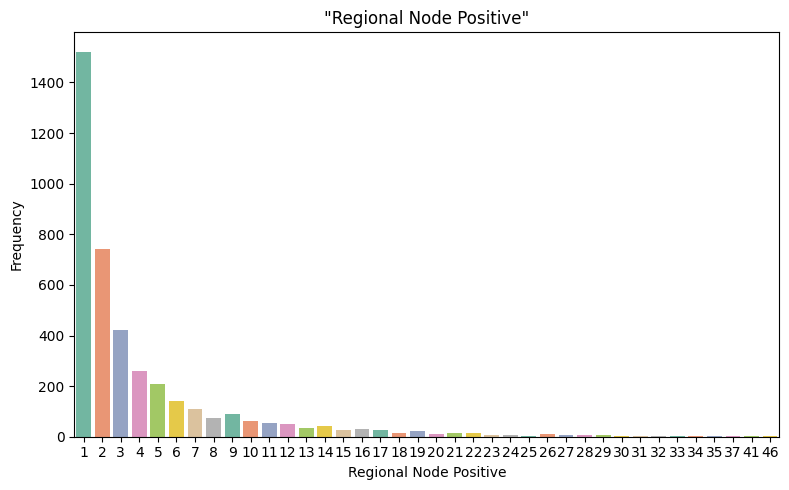

In [25]:
df.rename(columns={"Reginol Node Positive": "Regional Node Positive"}, inplace=True)
column_name = 'Regional Node Positive'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=column_name, palette='Set2')
plt.title(f'"{column_name}\"')
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Survival Months
69     81
63     73
56     73
102    73
98     72
       ..
7       5
3       4
11      4
2       3
1       1
Name: count, Length: 107, dtype: int64


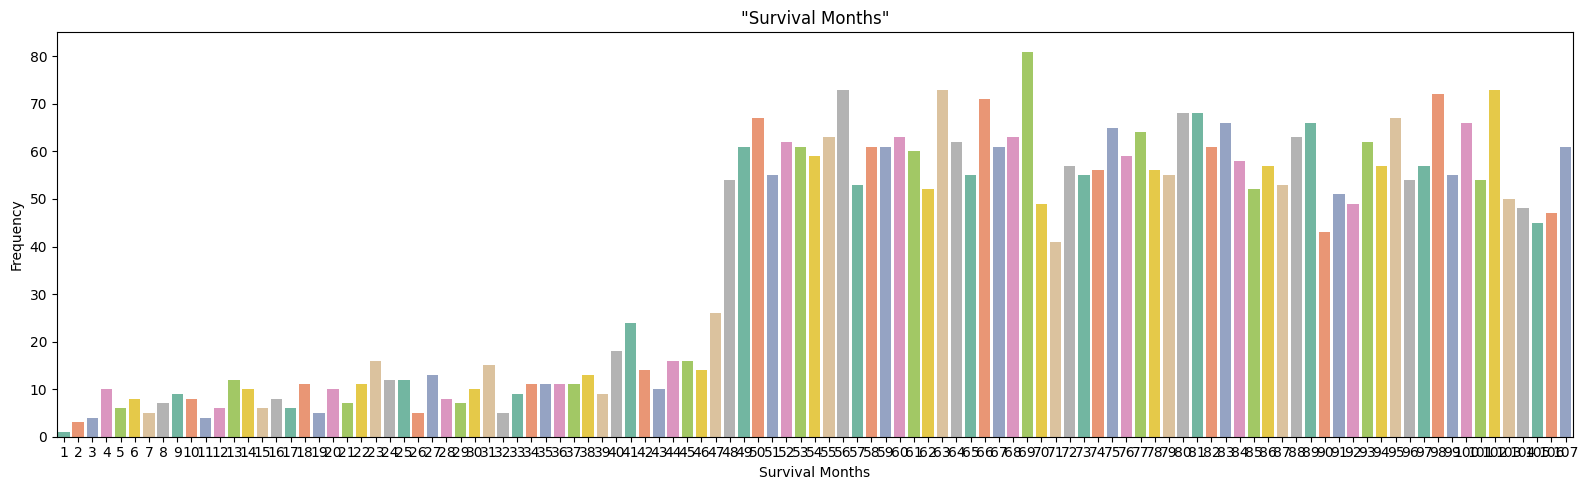

In [26]:
column_name = 'Survival Months'
print(df[column_name].value_counts())
plt.figure(figsize=(16, 5))
sns.countplot(data=df, x=column_name, palette='Set2')
plt.title(f'"{column_name}\"')
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Status
Alive    3408
Dead      616
Name: count, dtype: int64


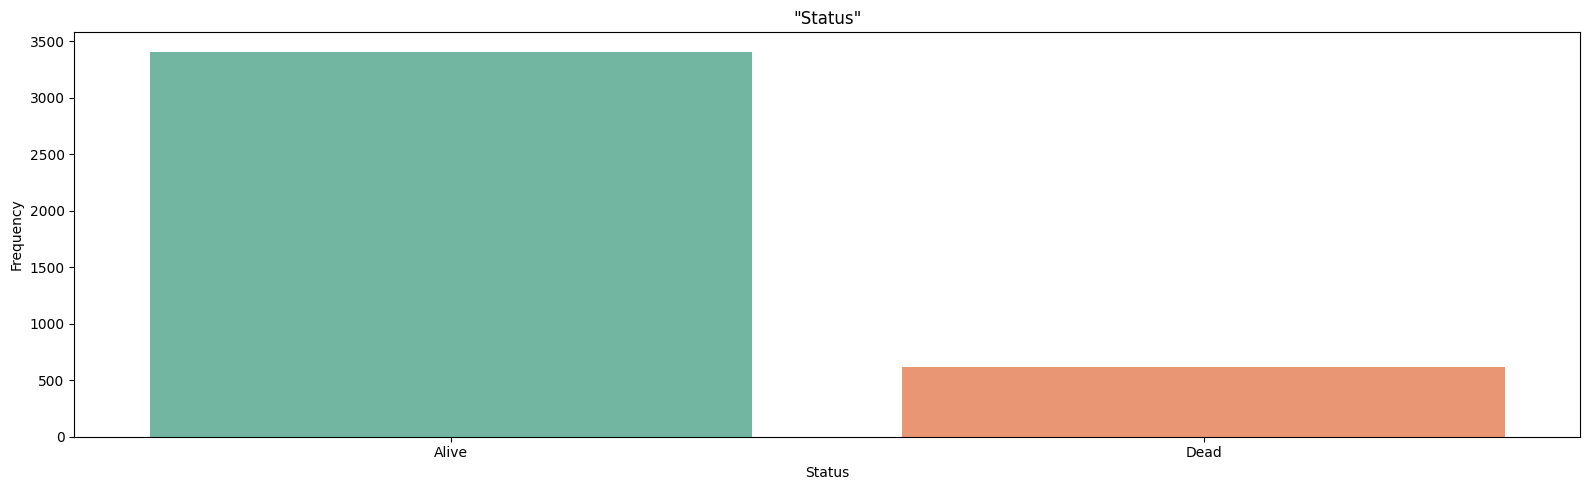

In [27]:
column_name = 'Status'
print(df[column_name].value_counts())
plt.figure(figsize=(16, 5))
sns.countplot(data=df, x=column_name, palette='Set2')
plt.title(f'"{column_name}\"')
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [28]:
status_mapping = {
    "Dead": 0,
    "Alive": 1
}
df["Status_encoded"] = df["Status"].map(status_mapping)

In [29]:
df = df.select_dtypes(exclude=['object'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          4024 non-null   int64
 1   Tumor Size                   4024 non-null   int64
 2   Regional Node Examined       4024 non-null   int64
 3   Regional Node Positive       4024 non-null   int64
 4   Survival Months              4024 non-null   int64
 5   Race_encoded                 4024 non-null   int64
 6   Marital_Status_encoded       4024 non-null   int64
 7   T_Stage_encoded              4024 non-null   int64
 8   N_Stage_encoded              4024 non-null   int64
 9   Stage_6th_encoded            4024 non-null   int64
 10  Differentiate_encoded        4024 non-null   int64
 11  Grade_encoded                4024 non-null   int64
 12  A_Stage_encoded              4024 non-null   int64
 13  Estrogen_Status_encoded      4024 non-null   int

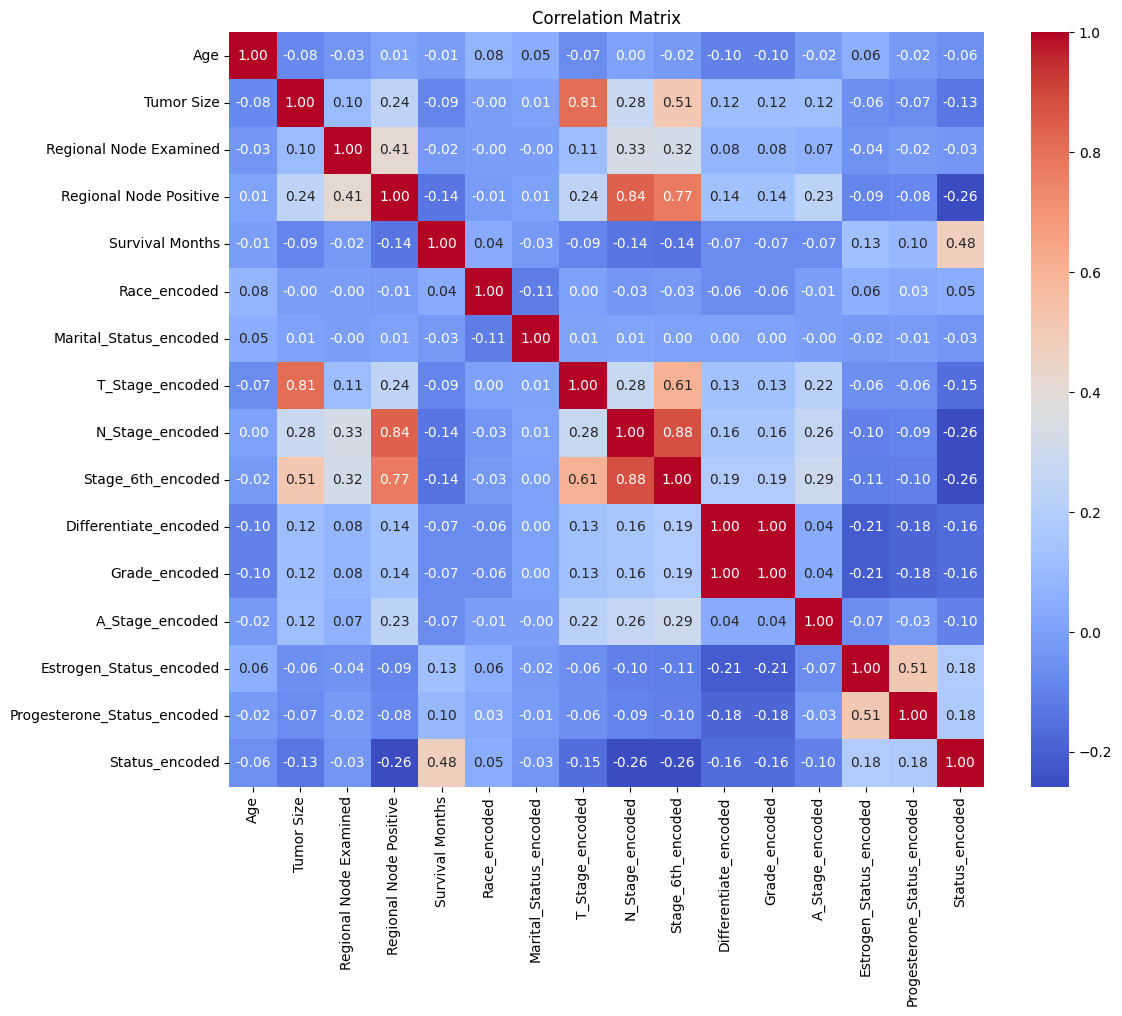

In [30]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


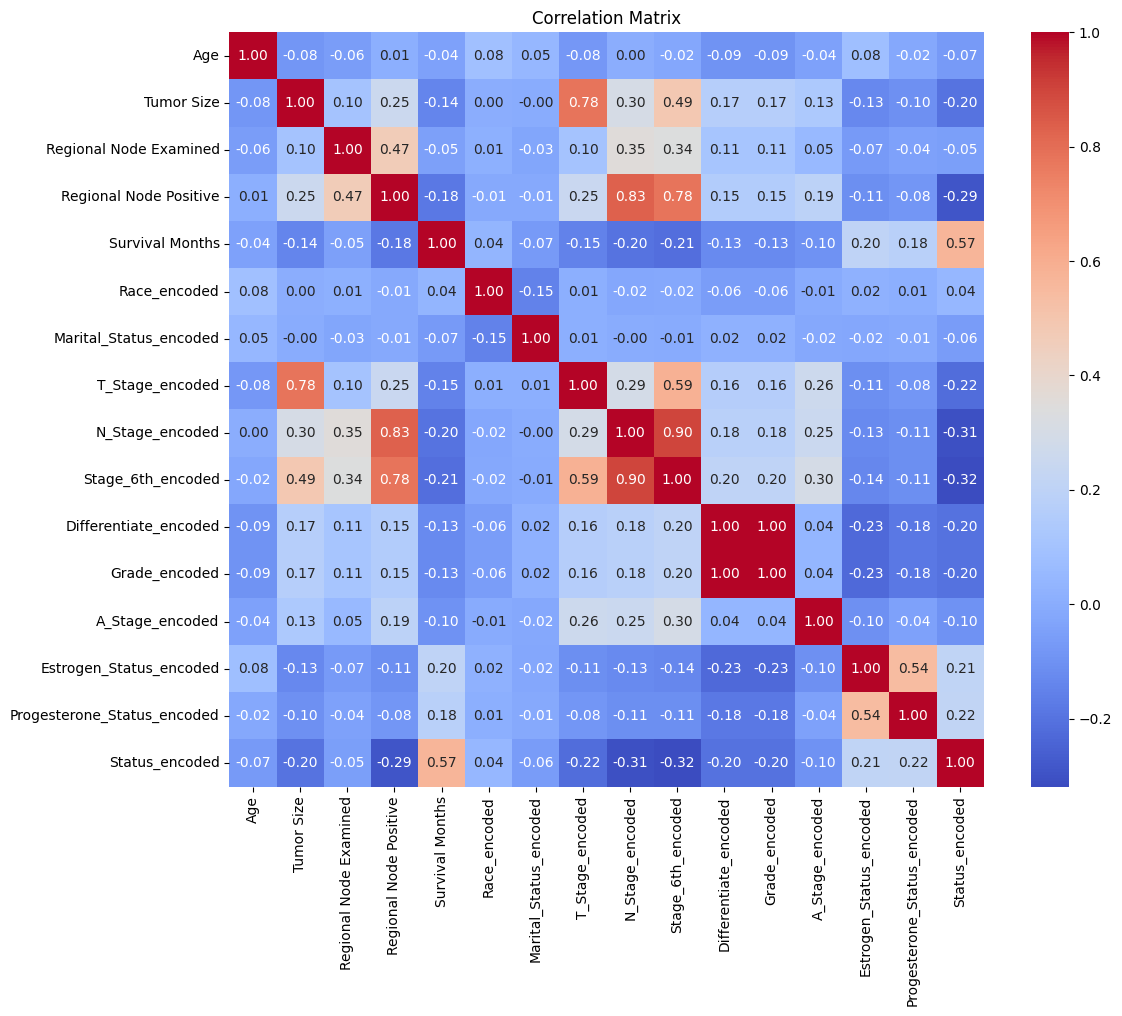

In [31]:
alive_df = df[df["Status_encoded"] == 1]
dead_df = df[df["Status_encoded"] == 0]

alive_target = int(len(dead_df) * 2)
alive_sampled = alive_df.sample(n=alive_target, random_state=55)

df_balanced = pd.concat([dead_df, alive_sampled]).reset_index(drop=True)
correlation_matrix = df_balanced.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [32]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1848 non-null   int64
 1   Tumor Size                   1848 non-null   int64
 2   Regional Node Examined       1848 non-null   int64
 3   Regional Node Positive       1848 non-null   int64
 4   Survival Months              1848 non-null   int64
 5   Race_encoded                 1848 non-null   int64
 6   Marital_Status_encoded       1848 non-null   int64
 7   T_Stage_encoded              1848 non-null   int64
 8   N_Stage_encoded              1848 non-null   int64
 9   Stage_6th_encoded            1848 non-null   int64
 10  Differentiate_encoded        1848 non-null   int64
 11  Grade_encoded                1848 non-null   int64
 12  A_Stage_encoded              1848 non-null   int64
 13  Estrogen_Status_encoded      1848 non-null   int

# Models

In [33]:
params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

X = df_balanced.drop("Status_encoded", axis=1)
y = df_balanced["Status_encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=55), params, cv=50, scoring='accuracy')
grid_dt.fit(X_train, y_train)
print("Best parameters:", grid_dt.best_params_)
print("Best score:", grid_dt.best_score_)


Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score: 0.8222068965517241


              precision    recall  f1-score   support

           0       0.81      0.63      0.71       128
           1       0.83      0.92      0.87       242

    accuracy                           0.82       370
   macro avg       0.82      0.78      0.79       370
weighted avg       0.82      0.82      0.82       370

Accuracy: 0.8216216216216217


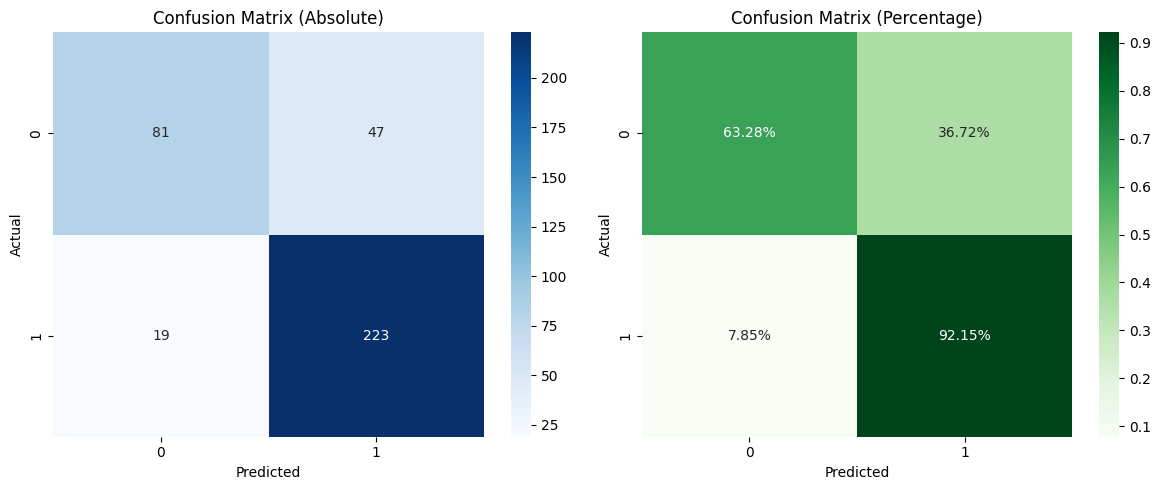

In [34]:
X = df_balanced.drop("Status_encoded", axis=1)
y = df_balanced["Status_encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=1, min_samples_split=5, random_state=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (Absolute)')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Greens', ax=ax[1])
ax[1].set_title('Confusion Matrix (Percentage)')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [35]:
params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=55), params, cv=10, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best parameters:", grid_rf.best_params_)
print("Best score:", grid_rf.best_score_)


Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.8390053318624746


              precision    recall  f1-score   support

           0       0.84      0.66      0.74       128
           1       0.84      0.93      0.88       242

    accuracy                           0.84       370
   macro avg       0.84      0.80      0.81       370
weighted avg       0.84      0.84      0.83       370

Accuracy: 0.8378378378378378


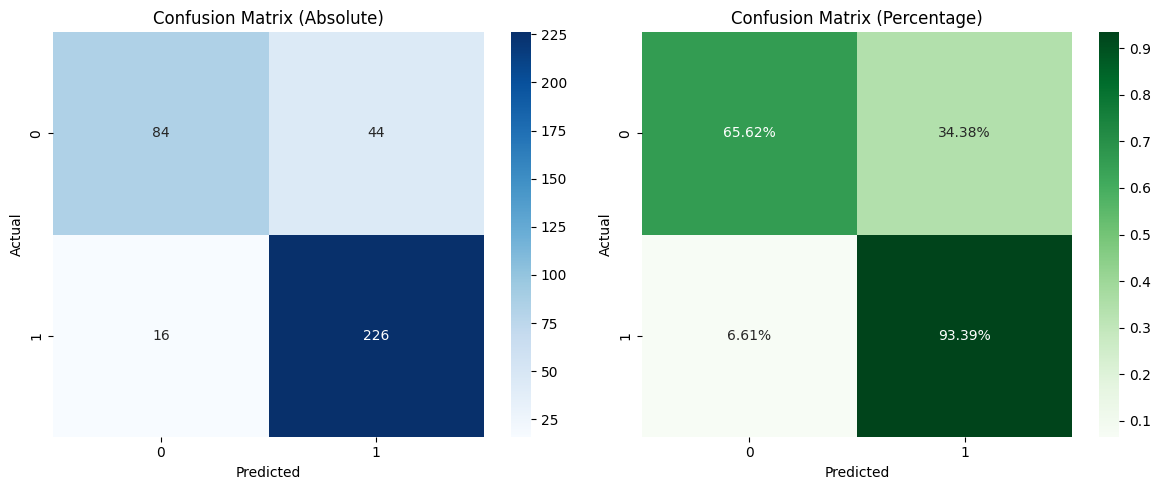

In [36]:
X = df_balanced.drop("Status_encoded", axis=1)
y = df_balanced["Status_encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=5
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (Absolute)')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Greens', ax=ax[1])
ax[1].set_title('Confusion Matrix (Percentage)')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [37]:
X = df_balanced.drop(["Status_encoded", "Age", "Race_encoded", "Regional Node Examined", "Marital_Status_encoded"], axis=1)
y = df_balanced["Status_encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [38]:
params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=55), params, cv=50, scoring='accuracy')
grid_dt.fit(X_train, y_train)
print("Best parameters:", grid_dt.best_params_)
print("Best score:", grid_dt.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score: 0.8256091954022987


              precision    recall  f1-score   support

           0       0.79      0.60      0.68       128
           1       0.81      0.92      0.86       242

    accuracy                           0.81       370
   macro avg       0.80      0.76      0.77       370
weighted avg       0.81      0.81      0.80       370

Accuracy: 0.8081081081081081


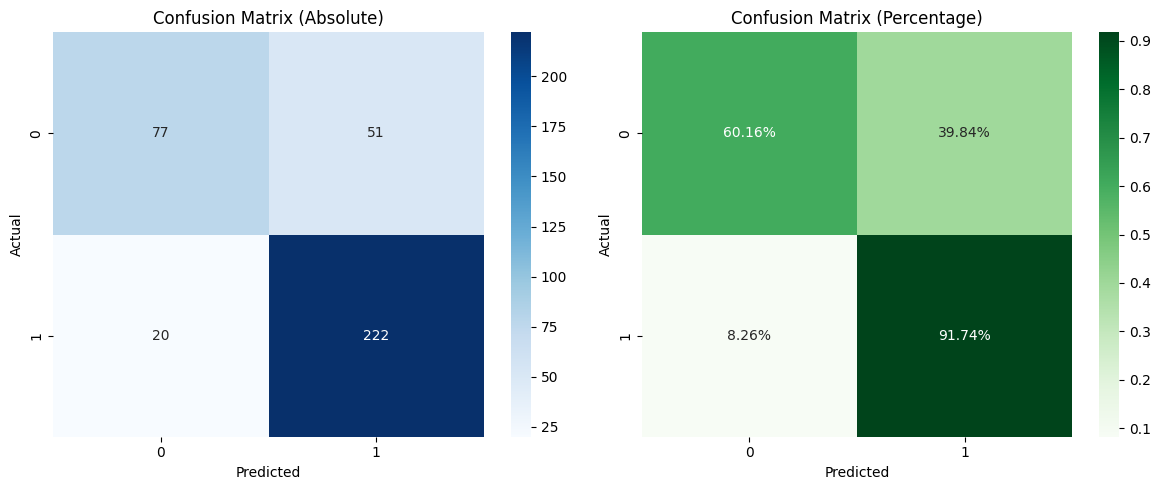

In [39]:
model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=4, min_samples_split=10, random_state=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (Absolute)')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Greens', ax=ax[1])
ax[1].set_title('Confusion Matrix (Percentage)')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [40]:
params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=55), params, cv=10, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best parameters:", grid_rf.best_params_)
print("Best score:", grid_rf.best_score_)


Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.8356223570509285


              precision    recall  f1-score   support

           0       0.87      0.62      0.73       128
           1       0.83      0.95      0.88       242

    accuracy                           0.84       370
   macro avg       0.85      0.79      0.81       370
weighted avg       0.84      0.84      0.83       370

Accuracy: 0.8378378378378378


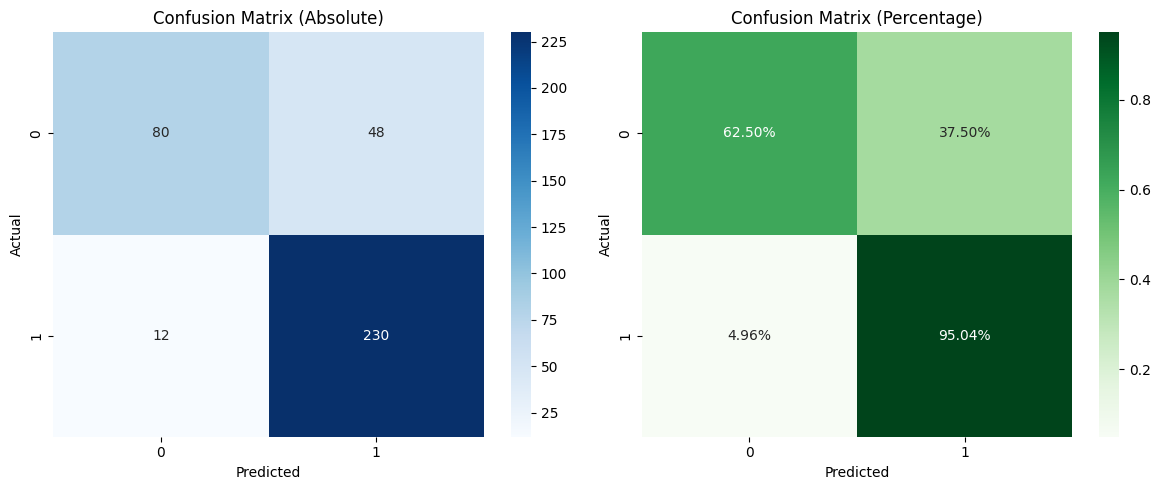

In [41]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=2,
    random_state=5
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (Absolute)')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Greens', ax=ax[1])
ax[1].set_title('Confusion Matrix (Percentage)')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()
